###**Problem Statement 1:**
*A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. We need to come up with useful insights using the data and make prediction models to forecast the sales for 12 weeks.*

### **Project Objective:**


*   *Using the data, find useful insights that can be used by each of the stores to improve in various areas.*
*   *Forecast the sales for each store for the next 12 weeks.*

### **Data Description**

Feature| Name Description
------|----------
Store |Store number
Date| Week of Sales
Weekly_Sales |Sales for the given store in that week
Holiday_Flag | If it is a holiday week
Temperature|  Temperature on the day of the sale
Fuel_Price | Cost of the fuel in the region
CPI | Consumer Price Index
Unemployment | Unemployment Rate

***Consumer Price Index or CPI:*** *The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time. The CPI is the most widely used measure of inflation, closely followed by policymakers, financial markets, businesses, and consumers.*

*Unemployment Rate: This is the unemployed who are willing to work and are actively looking for a job expressed as a per cent of the labour force.*



In [317]:
from google.colab import drive #connecting drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [318]:
#pip install pmdarima

In [319]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

In [320]:
#importing data
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Datasets/Walmart.csv')

In [321]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [322]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [323]:
df['Date']= pd.to_datetime(df['Date'], dayfirst=True)

In [324]:
df['Day']=pd.to_datetime(df['Date']).dt.day
df['Week']= pd.to_datetime(df['Date']).dt.week
df['Month']=pd.to_datetime(df['Date']).dt.month
df['Year']=pd.to_datetime(df['Date']).dt.year

<ipython-input-324-0eb7d150043f>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week']= pd.to_datetime(df['Date']).dt.week


In [325]:
df.shape

(6435, 12)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int64         
 9   Week          6435 non-null   int64         
 10  Month         6435 non-null   int64         
 11  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 603.4 KB


In [327]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,25.818182,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,14.129201,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,14.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,26.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,38.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,52.000000,12.000000,2012.000000


In [328]:
df['Store'].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [329]:
#Finding correlation of all features containing numerical data with each other using pandas inbuit corr() method.
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,1.478526e-15,3.106283e-15,2.910676e-15,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.740946e-02,7.421127e-02,7.614332e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,4.452608e-02,1.277427e-01,1.229958e-01,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.697332e-02,2.361833e-01,2.358618e-01,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,2.807253e-02,-3.240300e-02,-4.215590e-02,7.794703e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,2.684300e-03,6.041530e-03,4.979672e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-4.233293e-03,-1.589158e-02,-1.274559e-02,-2.418135e-01
Day,1.478526e-15,-0.017409,4.452608e-02,0.026973,0.028073,0.002684,-0.004233,1.000000e+00,1.037216e-01,1.519184e-02,6.405867e-03
Week,3.106283e-15,0.074211,1.277427e-01,0.236183,-0.032403,0.006042,-0.015892,1.037216e-01,1.000000e+00,9.959843e-01,-1.819189e-01
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,1.519184e-02,9.959843e-01,1.000000e+00,-1.944645e-01


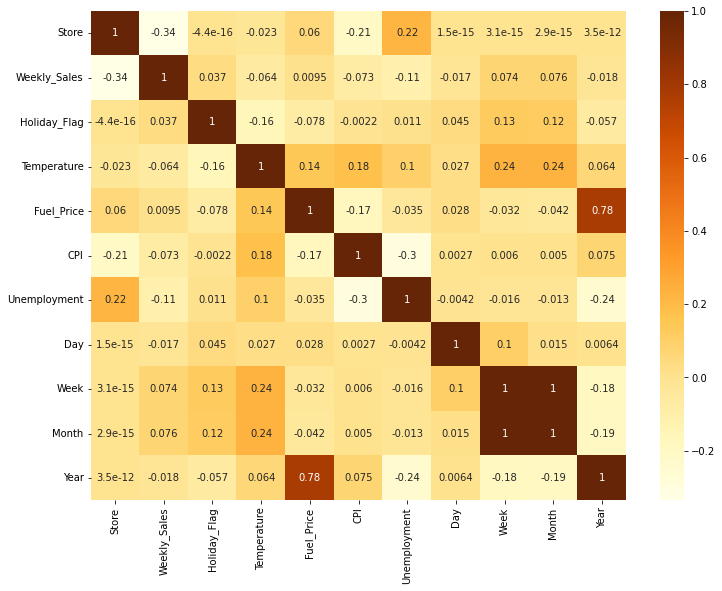

In [330]:
#visualizing above correlation using heatmeap
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),cmap='YlOrBr',annot=True)
sns.set_palette('bright')
plt.show()

*Inference:*

*   *We have 6435 rows and 12 columns of data after adding Day,Week,Month and Year.*
*   *All columns except date are of numerical datatype. Date was converted to datetime.*
*   *There are no null values in the data.*
*   *The correlation of Weekly_Sales is weak with Temprature, Unemployement and CPI as per the pearson method of correlation however the same independent variables might have a good correlation with each other.*
*   *There data is from 45 stores each with 143 observations of weekly sales.*

In [331]:
salesperstore=pd.DataFrame(df.groupby(by=['Store'],as_index=False)['Weekly_Sales'].mean())

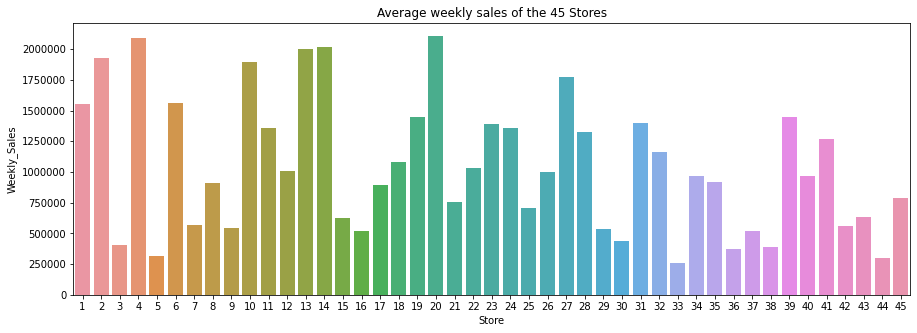

In [332]:
plt.figure(figsize=(15,5))
sns.barplot(x=salesperstore['Store'],y=salesperstore['Weekly_Sales'])
plt.title('Average weekly sales of the 45 Stores')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

*Inference :The weekly average sales is not constant for different stores.*

In [333]:
df[df['Weekly_Sales']==max(df['Weekly_Sales'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724,24,51,12,2010


*Inference :Store 14 has the maximum sales just before the christmas holiday.*

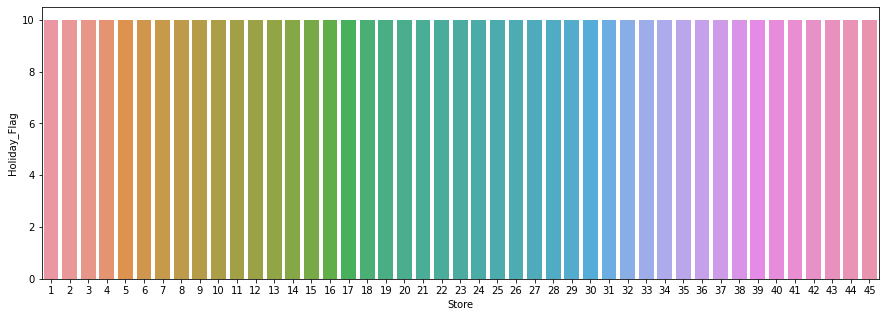

In [334]:
holidayperstore=pd.DataFrame(df.groupby(by=['Store'],as_index=False)['Holiday_Flag'].sum())
plt.figure(figsize=(15,5))
sns.barplot(x=holidayperstore['Store'],y=holidayperstore['Holiday_Flag'])
plt.show()

*Inference :Every Store has recorded 10 holidays weeks.*

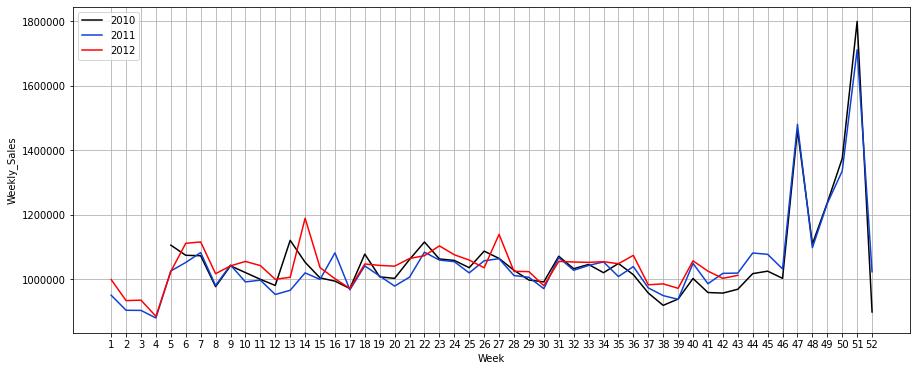

In [335]:
Weekly_2010_Sales=df[df['Year']==2010]['Weekly_Sales'].groupby(by=df['Week']).mean()
Weekly_2011_Sales=df[df['Year']==2011]['Weekly_Sales'].groupby(by=df['Week']).mean()
Weekly_2012_Sales=df[df['Year']==2012]['Weekly_Sales'].groupby(by=df['Week']).mean()

plt.figure(figsize=(15,6))
sns.lineplot(x=Weekly_2010_Sales.index,y=Weekly_2010_Sales,color='black')
sns.lineplot(x=Weekly_2011_Sales.index,y=Weekly_2011_Sales,color='#0F41D3')
sns.lineplot(x=Weekly_2012_Sales.index,y=Weekly_2012_Sales,color='red')
plt.xticks(np.arange(1,53))
plt.ticklabel_format(style='plain',axis='y')
plt.legend(['2010','2011','2012'])
plt.grid()
plt.show()

*Inference :There was a sudden peak in the weekly sales values at the end of the year 2010 and 2011.*

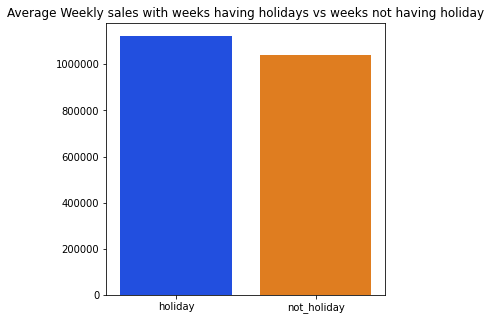

In [336]:
plt.figure(figsize=(5,5))
hol= df[df['Holiday_Flag']==1]['Weekly_Sales'].mean()
not_hol = df[df['Holiday_Flag'] != 1]['Weekly_Sales'].mean()

sns.barplot(x=['holiday','not_holiday'],y=[hol,not_hol])
plt.title('Average Weekly sales with weeks having holidays vs weeks not having holiday')
plt.ticklabel_format(style='plain', axis='y')
plt.show()



*Inference:* *Although the number of holidays accounts for the minority of the data, the weekly sales amount of these days increased noticeably.*

### **Data Pre-processing Steps**




*  *PART 1*

*We know from the heat map that the date and the holiday columns are contributing the most. However I would like to confirm the same with the help of predicting the weekly sales values using the `DecisionTreeRegression`. Then find the accuracy of the model using Weighted mean absolute error and compare the importance of the independent features. And finally validate the results by repeating the same using the `RamdomForestRegressor`.*

*  *PART 2*

*In the second step we will forecast the sales of all the stores for the next 12 weeks  using the `SARIMAX` model using the features that have been validated in the STEP 1 of the model.*

**STEPS**:
*  Check if all feature values are of the same data type.
*  Divide the data into features and target.
*  Divide the data into training and testing set of 80% and 20%
*  Normalize the trainig data using standard scaler.
*  Create DecisionTree model and check importance.
*  Checking error using RMSE
*  Visualize the important features.
*  Repeat above 3 steps with RandomForest

*  Prepare the data for forecasting.
*  Check for Stores with minimum and maximum sales.
*  Visualze the data.
*  Check if the data is stationary using adfuller test.
*  Visualize by decomposing the data into trend, seasonality and residue.
*  Install pmdarima
*  Find p,d,q values using auto_arima
*  Build and use SARIMAX to forecast future 12 weeks of weekly sales for the choosen stores.
*  Finding error in the model using Root Mean Squared Error.

In [337]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,9,3,2010


In [338]:
pd.to_datetime(df['Date'])


0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [339]:
#converting date to float values to be acceptable in regression model

df['Date']=df['Date'].astype(int).astype(float)

<ipython-input-339-204ff1901435>:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['Date']=df['Date'].astype(int).astype(float)


In [340]:
df.dtypes

Store             int64
Date            float64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Day               int64
Week              int64
Month             int64
Year              int64
dtype: object

In [341]:
#dividing data into target and features

features=df.drop(columns='Weekly_Sales')
target= df.Weekly_Sales

In [342]:
#splitting data in training and testing
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2,random_state=0)

In [343]:
#normalizing using standard scaler
ss= StandardScaler()
x_train=ss.fit_transform(X_train) #notice x_train and X_train (both stored differently)
x_test=ss.transform(X_test)

***Decision Tree Regressor***

In [344]:
dtr_model=DecisionTreeRegressor()
dtr_model.fit(x_train,y_train)
dtr_pred= dtr_model.predict(x_test)

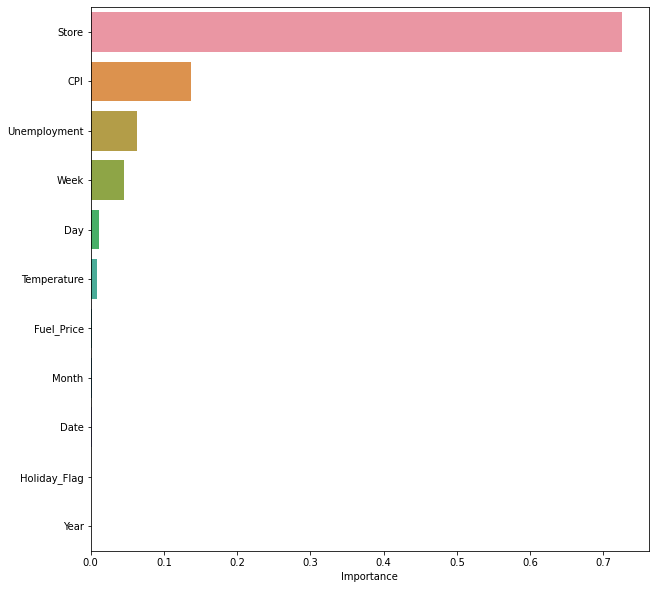

In [345]:
#dtr_model.feature_importances_

ft_imp=pd.DataFrame(np.transpose(dtr_model.feature_importances_),index=X_train.columns, columns=['Importance']).sort_values(by='Importance',ascending=False)
sns.barplot(x='Importance',y=ft_imp.index, data=ft_imp)
plt.show()

In [346]:
np.sqrt(mean_squared_error(y_test,dtr_pred))

133631.39023796815

***Random Forest Regressor***

In [347]:
rfr_model=RandomForestRegressor()
rfr_model.fit(x_train,y_train)
rfr_pred= rfr_model.predict(x_test)

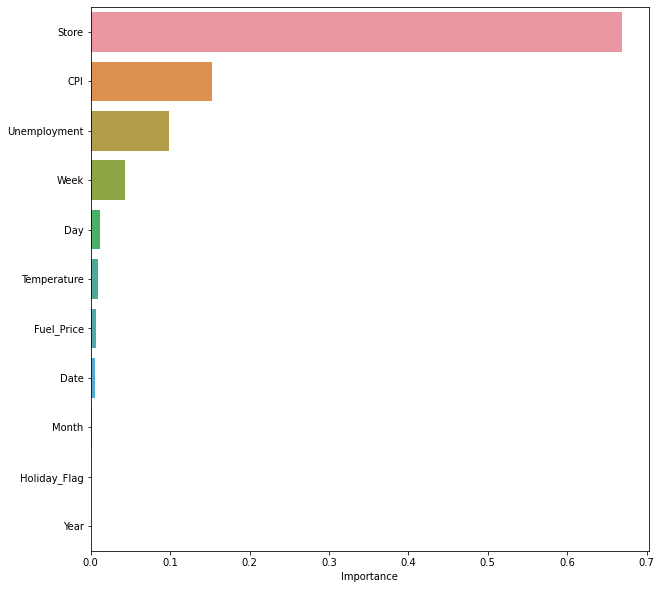

In [348]:
ft_imp=pd.DataFrame(np.transpose(rfr_model.feature_importances_),index=X_train.columns, columns=['Importance']).sort_values(by='Importance',ascending=False)
sns.barplot(x='Importance',y=ft_imp.index, data=ft_imp)
plt.show()

In [349]:
np.sqrt(mean_squared_error(y_test,rfr_pred))

107272.14680486229

####*Conclusion:*

*  *From heatmap we can infer that Store is the main feature from the DecisionTreeRegressor and the RandomForestRegressor models.*

*  *The error is little bit high but we can conclude from the heatmap and the above models that we can remove columns Unemployement,Week,Day,Temprature,Fuel_Price,Month,Year.*

### **Preparing Data for Forecasting**

In [350]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1.265328e+18,1643690.90,0,42.31,2.572,211.096358,8.106,5,5,2,2010
1,1,1.265933e+18,1641957.44,1,38.51,2.548,211.242170,8.106,12,6,2,2010
2,1,1.266538e+18,1611968.17,0,39.93,2.514,211.289143,8.106,19,7,2,2010
3,1,1.267142e+18,1409727.59,0,46.63,2.561,211.319643,8.106,26,8,2,2010
4,1,1.267747e+18,1554806.68,0,46.50,2.625,211.350143,8.106,5,9,3,2010


In [351]:
df['Date']=pd.to_datetime(df['Date']) #converting date back to datetime from float

In [352]:
#setting date index
df.index = df['Date']

In [353]:
#removing unwanted date column
df=df[['Store','CPI','Weekly_Sales','Holiday_Flag']]

In [354]:
df.head()

,Store,CPI,Weekly_Sales,Holiday_Flag
Date,,,,
2010-02-05,1,211.096358,1643690.90,0
2010-02-12,1,211.242170,1641957.44,1
2010-02-19,1,211.289143,1611968.17,0
2010-02-26,1,211.319643,1409727.59,0
2010-03-05,1,211.350143,1554806.68,0


In [355]:
#checking for highest and lowest average weekly sales of all the stores
df.groupby(by=['Store'],as_index=False)['Weekly_Sales'].mean().sort_values(by='Weekly_Sales',ascending=False)

,Store,Weekly_Sales
19,20,2.107677e+06
3,4,2.094713e+06
13,14,2.020978e+06
12,13,2.003620e+06
1,2,1.925751e+06
9,10,1.899425e+06
26,27,1.775216e+06
5,6,1.564728e+06
0,1,1.555264e+06
38,39,1.450668e+06


*Store 20 has the highest average weekly sales whereas store 33 has the lowest. Therefore we will compare both these forecasting using SARIMAX.*

In [356]:
max_store20 = df[df['Store']==20].sort_index()
min_store33 = df[df['Store']==33].sort_index()

In [357]:
max_store20.head()

,Store,CPI,Weekly_Sales,Holiday_Flag
Date,,,,
2010-02-05,20,204.247194,2401395.47,0
2010-02-12,20,204.385747,2109107.90,1
2010-02-19,20,204.432100,2161549.76,0
2010-02-26,20,204.463087,1898193.95,0
2010-03-05,20,204.494073,2119213.72,0


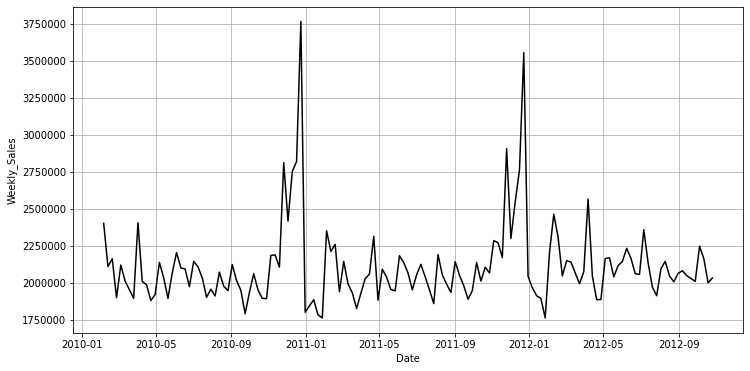

In [358]:
#visualizing store 20 data

plt.figure(figsize=(12,6))
sns.lineplot(x=max_store20.index,y=max_store20['Weekly_Sales'], color='black')
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

In [359]:
#checking stationarity using p value for store 20 suing adfuller test

#if p value > 0.5, data probably isn't stationary
#if p value <0.5, strong evidence that the null hypothesis is rejected thus the data is staionary
adfuller(max_store20['Weekly_Sales']) 

(-5.39373869285483,
 3.4912952838128377e-06,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 3553.6598733693677)

p= 0.00000349 means data is staionary

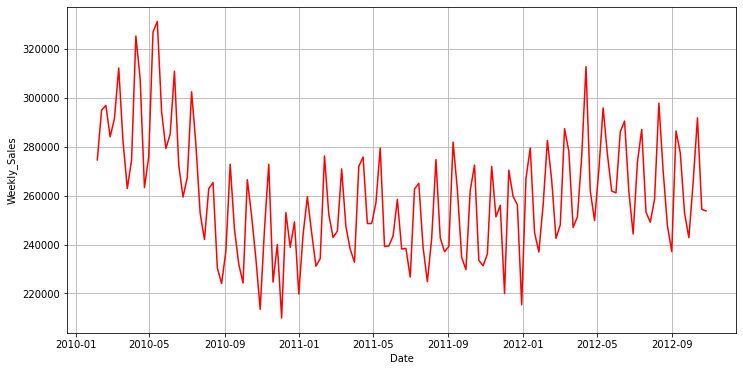

In [360]:
#visualizing store 33 data

plt.figure(figsize=(12,6))
sns.lineplot(x=min_store33.index,y=min_store33['Weekly_Sales'],color='red')
plt.grid()
plt.show()

In [361]:
#checking stationarity using p value for store 33

adfuller(min_store33['Weekly_Sales'])

(-4.137873325532302,
 0.0008379552269735709,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 2732.586113692095)

p= 0.00083 means data is stationary

In [362]:
#Decomposing store 20 weekly sales into trend,seasonality and residue.

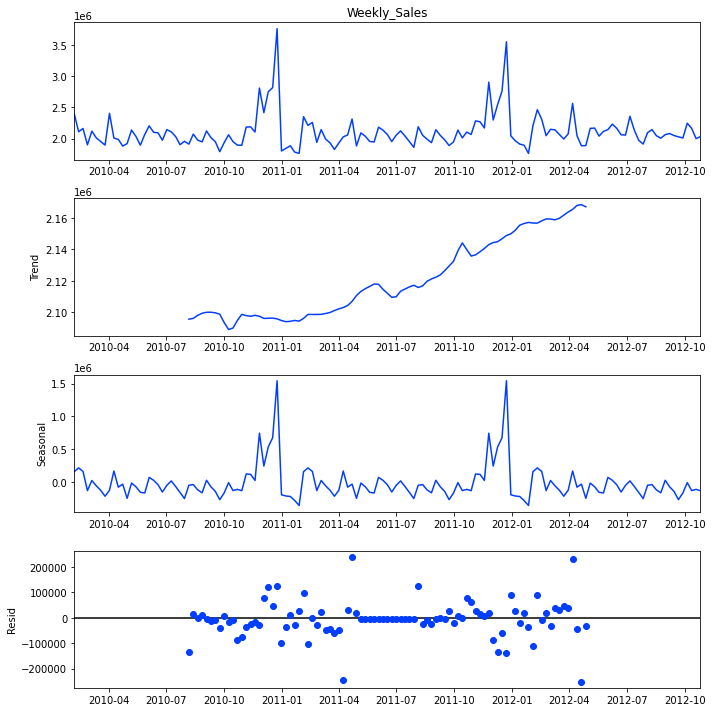

In [363]:
plt.rcParams.update({'figure.figsize': (10,10)})
decompose_ts_20= seasonal_decompose(max_store20['Weekly_Sales'])
decompose_ts_20.plot()
plt.tight_layout()
plt.show()

*Inference: A seasonality of 1 year i.e 52 weeks can be observed.*

In [364]:
#Decomposing store 33 weekly sales into trend,seasonality and residue.

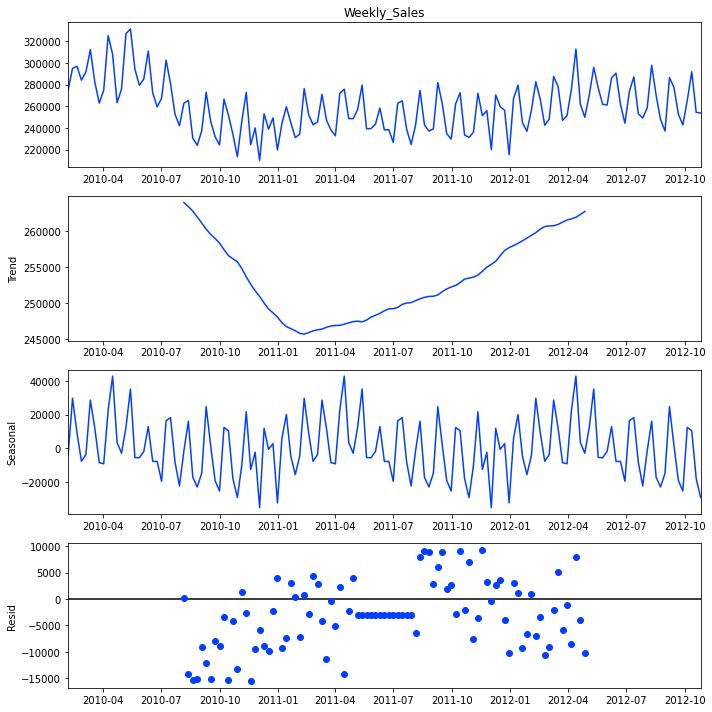

In [365]:
plt.rcParams.update({'figure.figsize': (10,10)})
decompose_ts_33= seasonal_decompose(min_store33['Weekly_Sales'])
decompose_ts_33.plot()
plt.tight_layout()
plt.show()

*Inference: A seasonality of 1 year i.e 52 weeks can be observed.*

In [366]:
#calculating p,d,q values for SARIMAX using auto_arima for store 20

pmd_model_20=auto_arima(max_store20['Weekly_Sales'],exogenous=max_store20.drop(columns=['Weekly_Sales','Store']))
pmd_model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1982.712
Date:                Sun, 08 Jan 2023   AIC                           3971.424
Time:                        04:00:19   BIC                           3980.313
Sample:                    02-05-2010   HQIC                          3975.036
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.304e+06   1.01e+05     12.964      0.000    1.11e+06     1.5e+06
ar.L1          0.3815      0.038     10.058      0.000       0.307       0.456
sigma2      6.452e+10      0.934   6.91e+10      0.000    6.45e+10    6.45e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               674.61
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             1.98
Prob(H) (two-sided):                  0.17   Kurtosis:                        12.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.12e+25. Standard errors may be unstable.
"""

*p,d,q values for SARIMAX for store 20 forecasting are 1,0,0*

In [367]:
#calculating p,d,q values for SARIMAX using auto_arima for store 33

pmd_model_33=auto_arima(min_store33['Weekly_Sales'],exogenous=min_store33.drop(columns=['Weekly_Sales','Store']))
pmd_model_33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1638.403
Date:                Sun, 08 Jan 2023   AIC                           3278.805
Time:                        04:00:20   BIC                           3281.761
Sample:                    02-05-2010   HQIC                          3280.007
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.113e+08   9.31e+07      6.570      0.000    4.29e+08    7.94e+08
===================================================================================
Ljung-Box (L1) (Q):                   3.21   Jarque-Bera (JB):                 4.78
Prob(Q):                              0.07   Prob(JB):                         0.09
Heteroskedasticity (H):               1.01   Skew:                             0.21
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*p,d,q values for SARIMAX for store 33 forecasting are 0,1,0*

In [368]:
#dividing data into test and train for endogenous and exogenous values

#store 20
train_20_y=max_store20.iloc[:135]['Weekly_Sales']
test_20_y= max_store20.iloc[135:]['Weekly_Sales']

train_20_x=max_store20.iloc[:135].drop(columns=['Weekly_Sales','Store'])
test_20_x= max_store20.iloc[135:].drop(columns=['Weekly_Sales','Store'])

#store 33

train_33_y=min_store33.iloc[:135]['Weekly_Sales']
test_33_y= min_store33.iloc[135:]['Weekly_Sales']

train_33_x=min_store33.iloc[:135].drop(columns=['Weekly_Sales','Store'])
test_33_x= min_store33.iloc[135:].drop(columns=['Weekly_Sales','Store'])

***SARIMAX***

In [369]:
#predicting testing data 

#store 20
sarimax_20= SARIMAX(train_20_y,order=(1,0,0), seasonal_order=(1,0,0,52),exog=train_20_x)
sarimax_20= sarimax_20.fit()
sarimax_predict_20=sarimax_20.predict(start=len(train_20_y),end=len(train_20_y)+len(test_20_y)-1, exog=test_20_x)

#store 33
sarimax_33= SARIMAX(train_33_y,order=(0,1,0), seasonal_order=(0,1,0,52),exog=train_33_x)
sarimax_33= sarimax_33.fit()
sarimax_predict_33=sarimax_33.predict(start=len(train_33_y),end=len(train_33_y)+len(test_33_y)-1, exog=test_33_x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [370]:
#root mean square error

print("SarimaxError prediction for store 20 :", rmse(test_20_y,sarimax_predict_20))
print("SarimaxError prediction for store 33 :", rmse(test_20_y,sarimax_predict_33))

SarimaxError prediction for store 20 : 84222.77281595493
SarimaxError prediction for store 33 : 1828455.5605176208


*Inference: The error for prediction is higher for store 33 compared to store 20.*

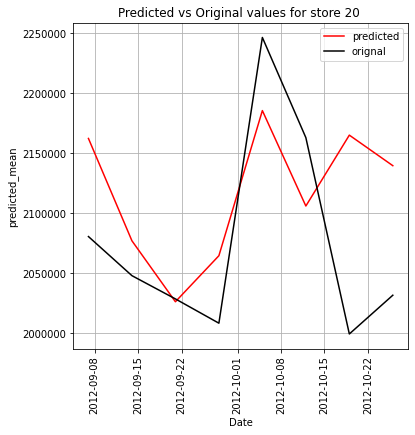

In [371]:
#comparing test predictions vs original test values for store 20

plt.figure(figsize=(6,6))
sns.lineplot(x=test_20_y.index,y=sarimax_predict_20,color='red')
sns.lineplot(x=test_20_y.index,y=test_20_y,color='black',)
plt.legend(['predicted','orignal'])
plt.title('Predicted vs Original values for store 20 ')
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.grid()
plt.show()

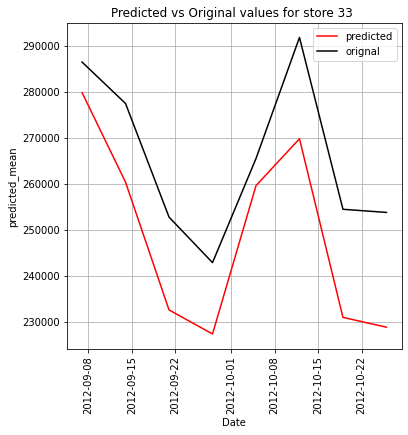

In [372]:
#comparing test predictions vs original test values for store 33

plt.figure(figsize=(6,6))
sns.lineplot(x=test_33_y.index,y=sarimax_predict_33,color='red')
sns.lineplot(x=test_33_y.index,y=test_33_y,color='black',)
plt.legend(['predicted','orignal'])
plt.title('Predicted vs Original values for store 33 ')
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.grid()
plt.show()

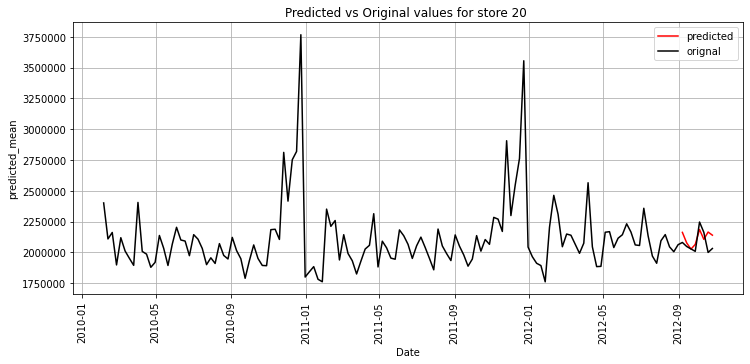

In [373]:
#comparing test predictions vs original data for store 20

plt.figure(figsize=(12,5))
sns.lineplot(x=test_20_y.index,y=sarimax_predict_20,color='red')
sns.lineplot(x=max_store20['Weekly_Sales'].index,y=max_store20['Weekly_Sales'],color='black',)
plt.legend(['predicted','orignal'])
plt.title('Predicted vs Original values for store 20 ')
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.grid()
plt.show()

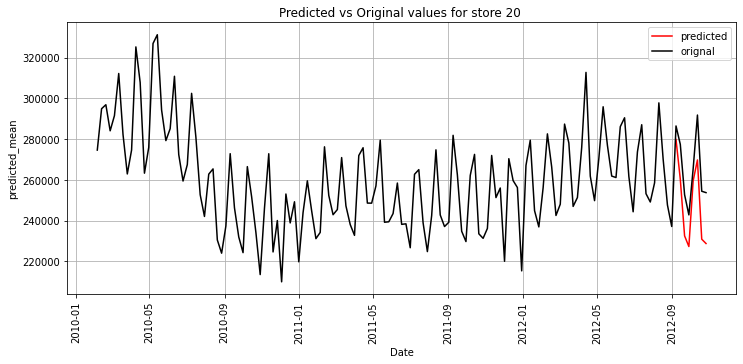

In [374]:
#comparing test predictions vs original data for store 33

plt.figure(figsize=(12,5))
sns.lineplot(x=test_33_y.index,y=sarimax_predict_33,color='red')
sns.lineplot(x=min_store33['Weekly_Sales'].index,y=min_store33['Weekly_Sales'],color='black',)
plt.legend(['predicted','orignal'])
plt.title('Predicted vs Original values for store 20 ')
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [375]:
#the CPI exogenous values for testing the future prediction have been extended for 12 weeks by simply selecting and drag filling in excel sheet
#the holiday column has been compared to the holidays of previous years have been aloted holiday for the week of New Year and Christmas

exog_20=pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Datasets/walmart_exog_store20.xlsx')
exog_33=pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Datasets/walmart_exog_store33.xlsx')

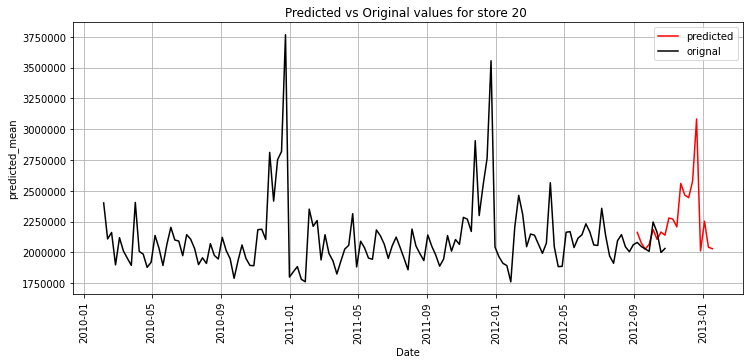

In [376]:
#forecasting 12 weeks of future values for store 20

forecast_20= sarimax_20.forecast(20, exog=exog_20[['CPI','Holiday_Flag']])

plt.figure(figsize=(12,5))
sns.lineplot(x=forecast_20.index,y=forecast_20,color='red')
sns.lineplot(x=max_store20['Weekly_Sales'].index,y=max_store20['Weekly_Sales'],color='black',)
plt.legend(['predicted','orignal'])
plt.title('Predicted vs Original values for store 20 ')
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.grid()
plt.show()

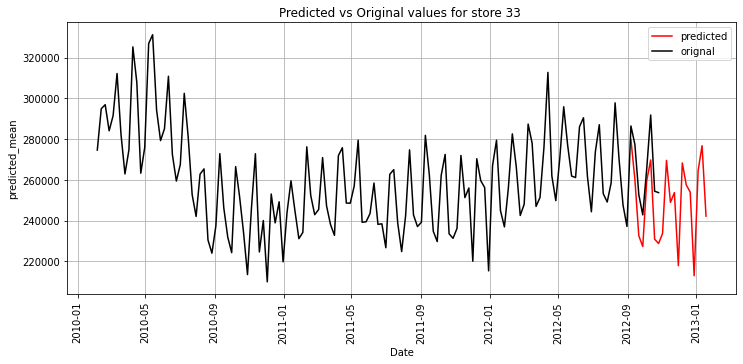

In [377]:
#forecasting 12 weeks of future values for store 33

forecast_33= sarimax_33.forecast(20, exog=exog_33[['CPI','Holiday_Flag']])
plt.figure(figsize=(12,5))
sns.lineplot(x=forecast_33.index,y=forecast_33,color='red')
sns.lineplot(x=min_store33['Weekly_Sales'].index,y=min_store33['Weekly_Sales'],color='black',)
plt.legend(['predicted','orignal'])
plt.title('Predicted vs Original values for store 33 ')
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.grid()
plt.show()

## **Conclusion:**

*  *Although the errors were high, future predictions does okay as observed from the visualizations.*

*  *We can infer that the CPI is playing in important part in the weekly sales.*

*  *For some stores the holiday weeks such as New Year bring good hike in sales which can be observed as a key difference between the stores with high average sales vs the stores with low average sales.*

